In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [7]:
data = pd.read_excel(r"C:\Users\denso\Downloads\owid-covid-data.xlsx", index_col=None, na_values=['NA'])


In [21]:
data.columns

Index(['location', 'date', 'total_cases', 'total_deaths', 'new_deaths',
       'total_vaccinations', 'total_boosters', 'total_boosters_per_hundred',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million', 'year'],
      dtype='object')

In [22]:
data.shape

(158392, 31)

In [11]:
columns_to_drop = ['iso_code', 'continent', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units','people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million']

data.drop(columns=columns_to_drop, axis=1, inplace=True)


In [12]:
data

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_boosters,total_boosters_per_hundred,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158387,Zimbabwe,2022-01-26,228943.0,5321.0,5.0,7533670.0,NaN,NaN,4221.0,0.028,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
158388,Zimbabwe,2022-01-27,229096.0,5324.0,3.0,7542874.0,NaN,NaN,4060.0,0.027,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
158389,Zimbabwe,2022-01-28,229333.0,5333.0,9.0,7554613.0,NaN,NaN,4102.0,0.027,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
158390,Zimbabwe,2022-01-29,229415.0,5333.0,0.0,7560787.0,NaN,NaN,3784.0,0.025,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [13]:
data['date'] = pd.to_datetime(data['date'])


In [14]:
data['year'] = data['date'].dt.year


In [15]:
columns_to_keep = ['location', 'year', 'total_cases', 'total_deaths', 'new_deaths', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','total_vaccinations']


In [16]:
grouped_data = data[columns_to_keep].groupby(['location', 'year']).agg('first').reset_index()


In [17]:
grouped_data

,location,year,total_cases,total_deaths,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_vaccinations
0,Afghanistan,2020,5.0,1.0,1.0,8.33,3.983543e+07,54.422,18.6,2.581,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Afghanistan,2021,52513.0,2201.0,12.0,12.04,3.983543e+07,54.422,18.6,2.581,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,0.0
2,Afghanistan,2022,158107.0,7356.0,0.0,19.44,3.983543e+07,54.422,18.6,2.581,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,4903368.0
3,Africa,2020,1.0,1.0,0.0,NaN,1.373486e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,2021,2788203.0,66126.0,658.0,NaN,1.373486e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Zambia,2021,20997.0,390.0,2.0,49.07,1.892066e+07,22.995,17.7,2.480,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,0.0
689,Zambia,2022,257948.0,3740.0,6.0,37.96,1.892066e+07,22.995,17.7,2.480,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,1793721.0
690,Zimbabwe,2020,1.0,1.0,1.0,27.78,1.509217e+07,42.729,19.6,2.822,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
691,Zimbabwe,2021,14084.0,369.0,6.0,69.44,1.509217e+07,42.729,19.6,2.822,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,39.0


In [18]:
grouped_data.shape

(693, 22)

In [19]:
grouped_data.columns

Index(['location', 'year', 'total_cases', 'total_deaths', 'new_deaths',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_vaccinations'],
      dtype='object')

In [20]:
grouped_data.isnull().sum()

location                        0
year                            0
total_cases                    14
total_deaths                   62
new_deaths                     62
stringency_index              154
population                      4
population_density             79
median_age                    125
aged_65_older                 131
aged_70_older                 128
gdp_per_capita                118
extreme_poverty               318
cardiovasc_death_rate         128
diabetes_prevalence            96
female_smokers                256
male_smokers                  262
handwashing_facilities        407
hospital_beds_per_thousand    183
life_expectancy                45
human_development_index       129
total_vaccinations            199
dtype: int64

In [126]:
cleaned_data = grouped_data.dropna(subset=['total_cases', 'total_deaths', 'new_deaths', 'population', 'life_expectancy', 'human_development_index'])


In [127]:
cleaned_data['median_age'].fillna(cleaned_data['median_age'].median(), inplace=True)
cleaned_data['aged_65_older'].fillna(cleaned_data['aged_65_older'].median(), inplace=True)
cleaned_data['aged_70_older'].fillna(cleaned_data['aged_70_older'].median(), inplace=True)
cleaned_data['gdp_per_capita'].fillna(cleaned_data['gdp_per_capita'].median(), inplace=True)
cleaned_data['extreme_poverty'].fillna(cleaned_data['extreme_poverty'].median(), inplace=True)
cleaned_data['cardiovasc_death_rate'].fillna(cleaned_data['cardiovasc_death_rate'].median(), inplace=True)
cleaned_data['diabetes_prevalence'].fillna(cleaned_data['diabetes_prevalence'].median(), inplace=True)
cleaned_data['female_smokers'].fillna(cleaned_data['female_smokers'].median(), inplace=True)
cleaned_data['male_smokers'].fillna(cleaned_data['male_smokers'].median(), inplace=True)
cleaned_data['handwashing_facilities'].fillna(cleaned_data['handwashing_facilities'].median(), inplace=True)
cleaned_data['hospital_beds_per_thousand'].fillna(cleaned_data['hospital_beds_per_thousand'].median(), inplace=True)
cleaned_data['stringency_index'].fillna(cleaned_data['stringency_index'].median(), inplace=True)
cleaned_data['population_density'].fillna(cleaned_data['population_density'].median(), inplace=True)
cleaned_data['total_vaccinations'].fillna(cleaned_data['total_vaccinations'].median(), inplace=True)



C:\Users\denso\AppData\Local\Temp\ipykernel_18612\3336562488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['median_age'].fillna(cleaned_data['median_age'].median(), inplace=True)
C:\Users\denso\AppData\Local\Temp\ipykernel_18612\3336562488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['aged_65_older'].fillna(cleaned_data['aged_65_older'].median(), inplace=True)
C:\Users\denso\AppData\Local\Temp\ipykernel_18612\3336562488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [128]:
cleaned_data .isnull().sum()

location                      0
year                          0
total_cases                   0
total_deaths                  0
new_deaths                    0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
total_vaccinations            0
dtype: int64

In [129]:
cleaned_data

,location,year,total_cases,total_deaths,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_vaccinations
0,Afghanistan,2020,1.0,1.0,1.0,8.33,38928341.0,54.422,18.6,2.581,...,2.2,597.029,9.59,5.9,31.2,37.746,0.50,64.83,0.511,117.5
1,Afghanistan,2021,51526.0,2191.0,0.0,12.04,38928341.0,54.422,18.6,2.581,...,2.2,597.029,9.59,5.9,31.2,37.746,0.50,64.83,0.511,0.0
4,Albania,2020,2.0,1.0,1.0,8.33,2877800.0,104.871,38.0,13.188,...,1.1,304.195,10.08,7.1,51.2,49.542,2.89,78.57,0.795,117.5
5,Albania,2021,58316.0,1181.0,0.0,56.48,2877800.0,104.871,38.0,13.188,...,1.1,304.195,10.08,7.1,51.2,49.542,2.89,78.57,0.795,0.0
6,Algeria,2020,1.0,1.0,1.0,0.00,43851043.0,17.348,29.1,6.211,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,117.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Yemen,2021,2101.0,610.0,0.0,27.78,29825968.0,53.508,20.3,2.922,...,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470,117.5
415,Zambia,2020,2.0,1.0,1.0,16.67,18383956.0,22.995,17.7,2.480,...,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,117.5
416,Zambia,2021,20997.0,390.0,2.0,49.07,18383956.0,22.995,17.7,2.480,...,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,0.0
417,Zimbabwe,2020,1.0,1.0,1.0,27.78,14862927.0,42.729,19.6,2.822,...,21.4,307.846,1.82,1.6,30.7,36.791,1.70,61.49,0.571,117.5


In [140]:
cleaned_data.describe()

,year,total_cases,total_deaths,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_vaccinations
count,349.000000,3.490000e+02,3.490000e+02,349.000000,349.000000,3.490000e+02,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.00000,349.000000,349.000000,3.490000e+02
mean,2020.510029,4.817345e+05,1.050973e+04,55.945559,37.705788,8.873535e+07,203.220364,30.351003,8.695086,5.489834,...,10.179083,258.266169,7.674470,9.536298,32.084441,50.050410,2.89493,72.740516,0.723794,8.792566e+04
std,0.500617,4.681542e+06,1.012225e+05,534.381144,26.205732,6.060772e+08,639.309178,9.074885,6.200148,4.237017,...,17.820147,118.454028,3.820297,9.541901,11.840557,22.947644,2.22720,7.595476,0.152914,7.326385e+05
min,2020.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,3.813700e+04,1.980000,15.100000,1.144000,0.526000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.10000,53.280000,0.394000,0.000000e+00
25%,2020.000000,1.000000e+00,1.000000e+00,1.000000,12.040000,2.963234e+06,36.253000,22.000000,3.402000,2.034000,...,1.200000,168.711000,5.180000,2.400000,24.700000,47.964000,1.38000,67.040000,0.592000,0.000000e+00
50%,2021.000000,1.570000e+02,3.000000e+00,1.000000,37.040000,1.013918e+07,81.721000,29.600000,6.293000,3.833000,...,2.200000,242.648000,7.110000,5.900000,31.200000,49.542000,2.35850,74.300000,0.744000,1.175000e+02
75%,2021.000000,5.862900e+04,7.170000e+02,3.000000,60.190000,3.297185e+07,197.519000,38.700000,14.178000,8.678000,...,6.400000,325.721000,9.850000,14.300000,38.000000,50.540000,3.70000,78.490000,0.848000,7.320000e+02
max,2021.000000,8.409262e+07,1.834604e+06,9662.000000,89.810000,7.794799e+09,7915.731000,48.200000,27.049000,18.493000,...,77.600000,724.417000,22.020000,44.000000,78.100000,98.999000,13.05000,84.630000,0.957000,9.127746e+06


In [130]:
# Beregning af det samlede antal tilfælde pr. lokation
total_cases_by_location = cleaned_data.groupby('location')['total_cases'].sum().reset_index()

In [131]:
# Beregning af det samlede antal dødsfald pr. lokation
total_deaths_by_location = cleaned_data.groupby('location')['total_deaths'].sum().reset_index()

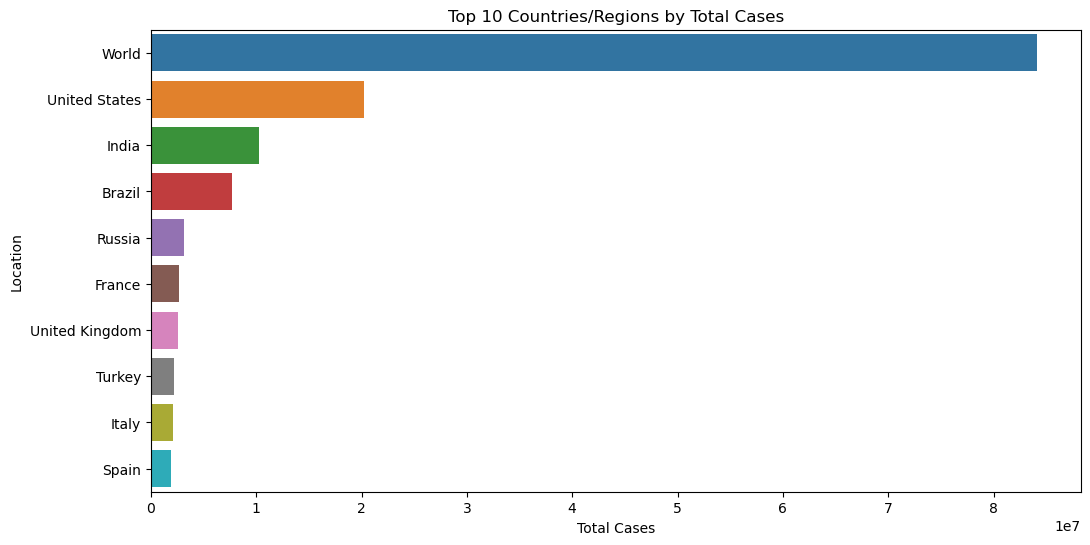

In [132]:
# Visualisering af det samlede antal tilfælde og dødsfald pr. lokation
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=total_cases_by_location.sort_values(by='total_cases', ascending=False).head(10))
plt.title('Top 10 Countries/Regions by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Location')
plt.show()


C:\Users\denso\AppData\Local\Temp\ipykernel_18612\1904425477.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(tick_labels, rotation=45, ha='right')


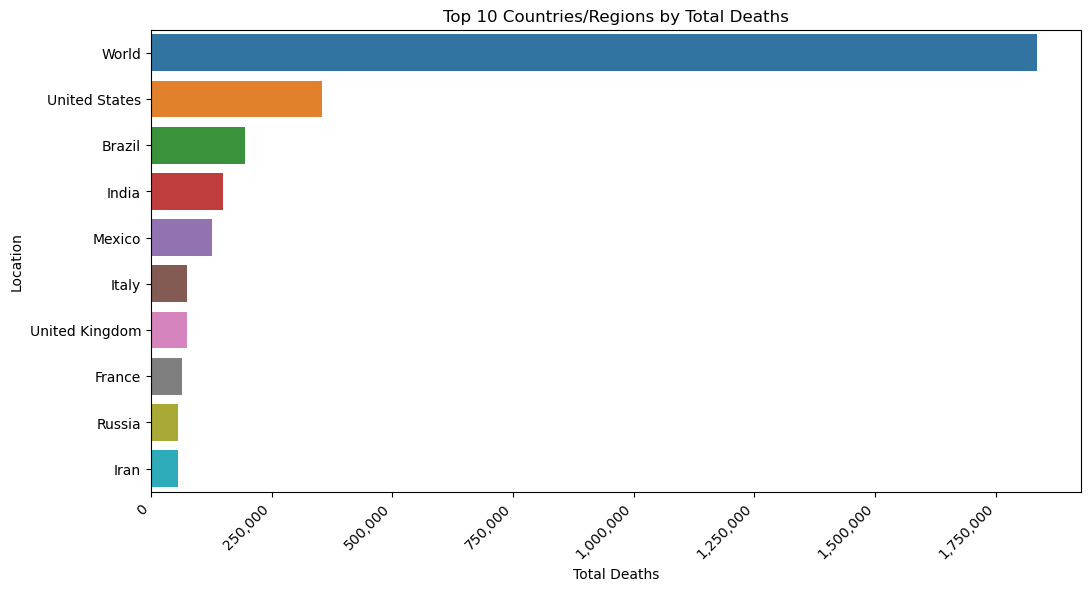

In [133]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='total_deaths', y='location', data=total_deaths_by_location.sort_values(by='total_deaths', ascending=False).head(10))
plt.title('Top 10 Countries/Regions by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Location')

# Tilpas tick labels på x-aksen til at vise det faktiske antal dødsfald
tick_labels = [f'{int(x):,}' for x in barplot.get_xticks()]  # Konverterer numeriske værdier til kommaseparerede strenge
barplot.set_xticklabels(tick_labels, rotation=45, ha='right')

plt.show()


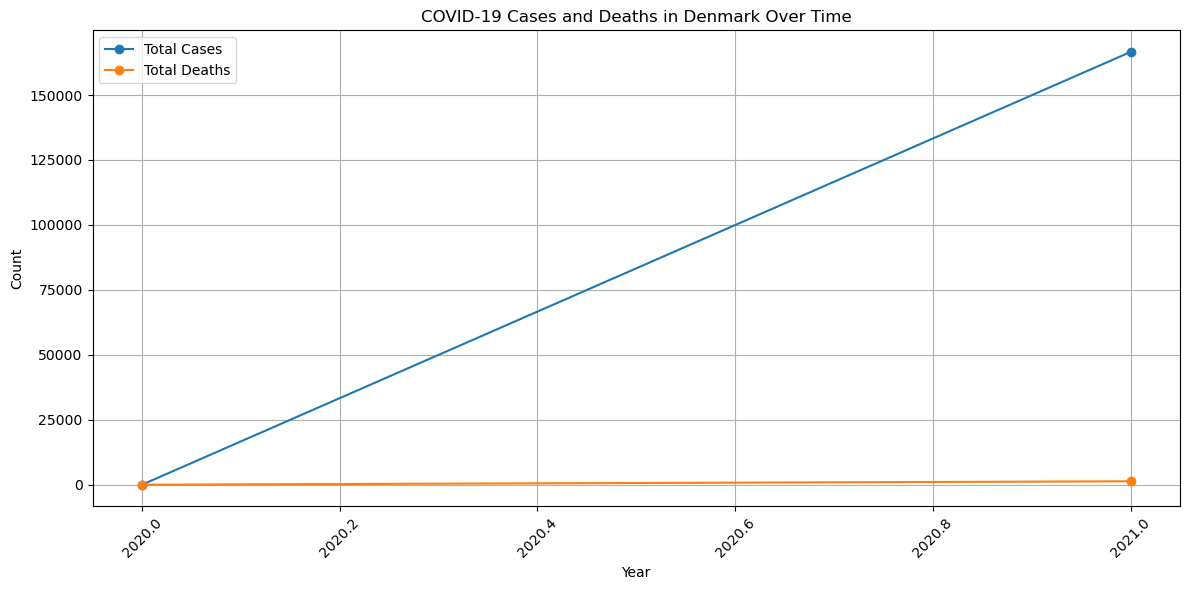

In [134]:
# Filtrer data for Danmark
denmark_data = grouped_data[grouped_data['location'] == 'Denmark']

# Gruppér data efter dato og summer antallet af tilfælde og dødsfald for hver dato
denmark_daily_data = denmark_data.groupby('year')[['total_cases', 'total_deaths']].sum().reset_index()


# Plot linjediagrammet
plt.figure(figsize=(12, 6))
plt.plot(denmark_daily_data['year'], denmark_daily_data['total_cases'], marker='o', label='Total Cases')
plt.plot(denmark_daily_data['year'], denmark_daily_data['total_deaths'], marker='o', label='Total Deaths')
plt.title('COVID-19 Cases and Deaths in Denmark Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


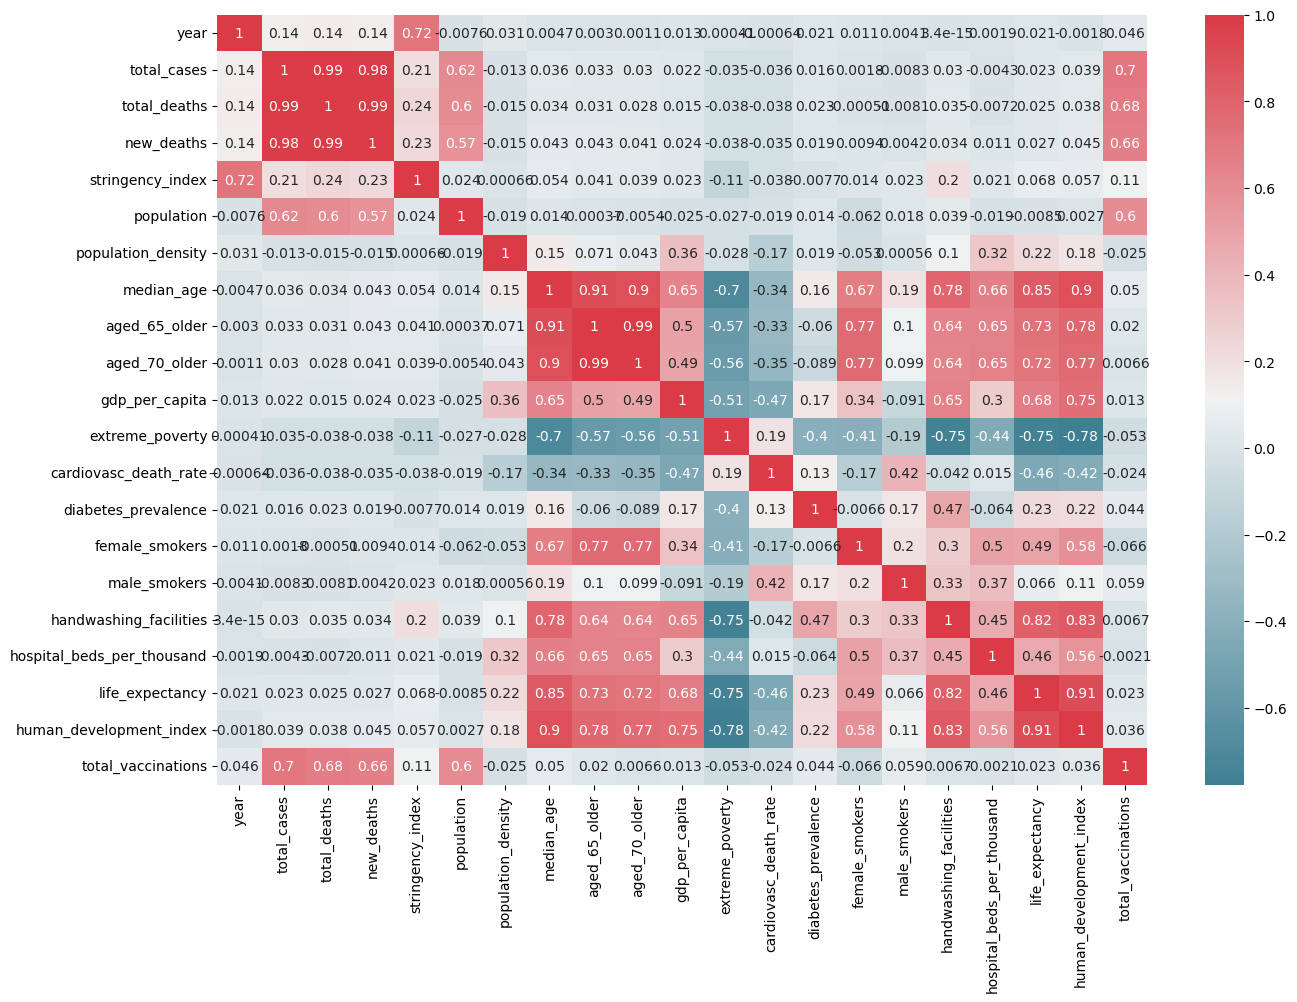

In [135]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(15, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), annot=True, cmap=colormap)

# Vi kan vælge de numeriske kolonner fra vores grouped_data DataFrame
numerical_data = grouped_data.select_dtypes(include='number')
correlation_heatmap(numerical_data)





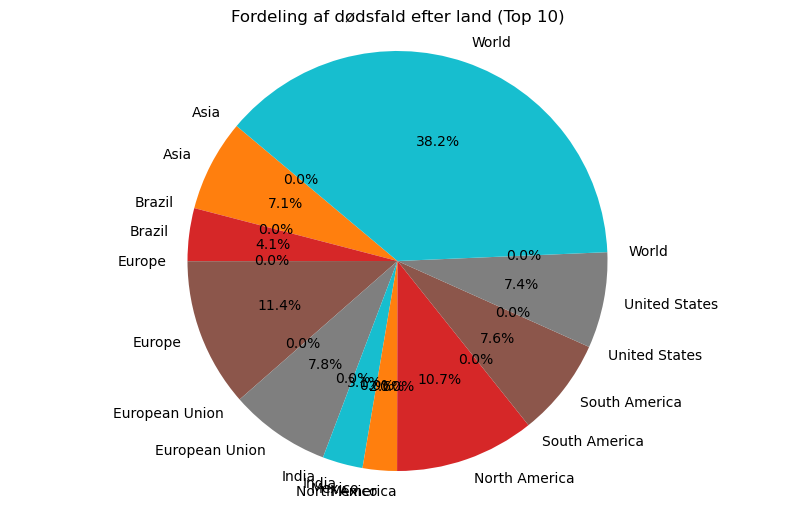

In [136]:

# Vælg den kolonne, du vil visualisere
column_to_plot = 'total_deaths'

# Filtrer dataene for at inkludere kun de ti lande med flest dødsfald
top_10_countries = grouped_data.groupby('location')[column_to_plot].max().nlargest(10).index
data_for_plot = grouped_data[grouped_data['location'].isin(top_10_countries)]

# Opsætning af diagrammet
plt.figure(figsize=(10, 6))

# Lav et kagediagram
plt.pie(data_for_plot[column_to_plot], labels=data_for_plot['location'], autopct='%1.1f%%', startangle=140)

# Tilføj titel
plt.title('Fordeling af dødsfald efter land (Top 10)')

# Vis diagrammet
plt.axis('equal')  # Sørg for at cirklen er perfekt rund
plt.show()


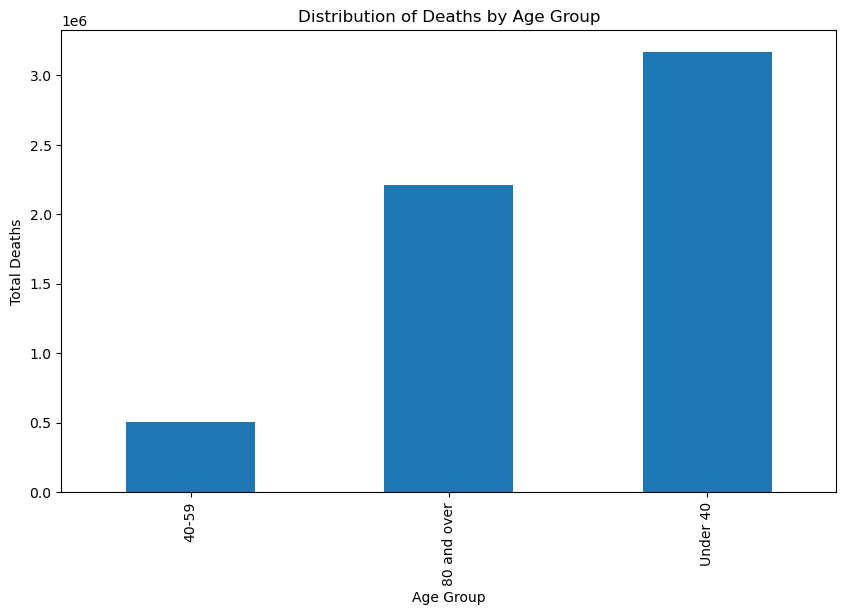

In [137]:
# Funktion til at definere aldersgrupper baseret på medianalderen
def define_age_group(median_age):
    if median_age < 40:
        return 'Under 40'
    elif median_age < 60:
        return '40-59'
    elif median_age < 80:
        return '60-79'
    else:
        return '80 and over'

# Opret den nye 'age_group' kolonne ved at anvende funktionen på 'median_age'
grouped_data['age_group'] = grouped_data['median_age'].apply(define_age_group)

# Gruppér data efter 'age_group' og sum antallet af dødsfald i hver aldersgruppe
deaths_by_age_group = grouped_data.groupby('age_group')['total_deaths'].sum()

# Opret et stapeldiagram
plt.figure(figsize=(10, 6))
deaths_by_age_group.plot(kind='bar', stacked=True)
plt.title('Distribution of Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.show()



In [138]:
print(deaths_by_age_group)

age_group
40-59           500800.0
80 and over    2209101.0
Under 40       3167110.0
Name: total_deaths, dtype: float64


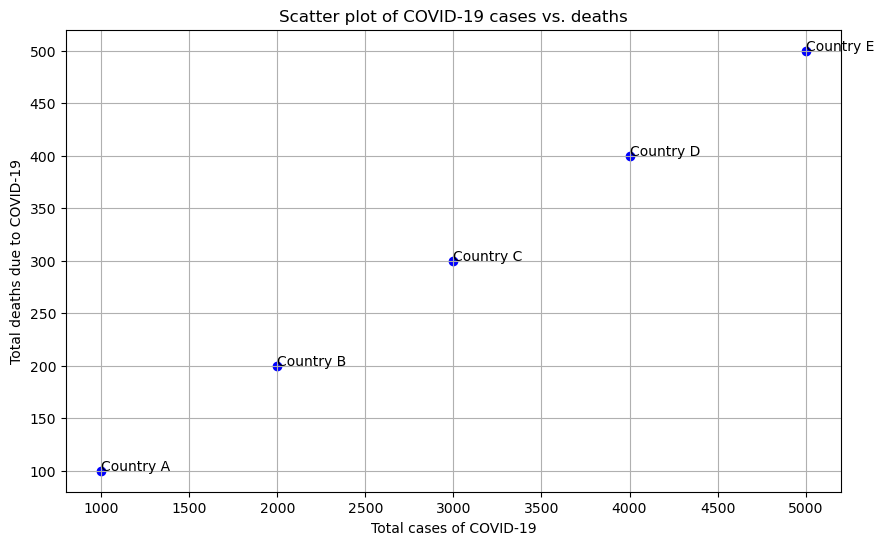

In [139]:
import matplotlib.pyplot as plt

# Antal tilfælde af COVID-19
total_cases = [1000, 2000, 3000, 4000, 5000]

# Antal dødsfald som følge af COVID-19
total_deaths = [100, 200, 300, 400, 500]

# Liste over lande eller regioner
countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']

# Lav et scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_cases, total_deaths, color='blue')

# Tilføj landenavne som tekst til hvert punkt
for i, country in enumerate(countries):
    plt.text(total_cases[i], total_deaths[i], country)

# Tilføj labels og titel
plt.xlabel('Total cases of COVID-19')
plt.ylabel('Total deaths due to COVID-19')
plt.title('Scatter plot of COVID-19 cases vs. deaths')

# Vis grafen
plt.grid(True)
plt.show()


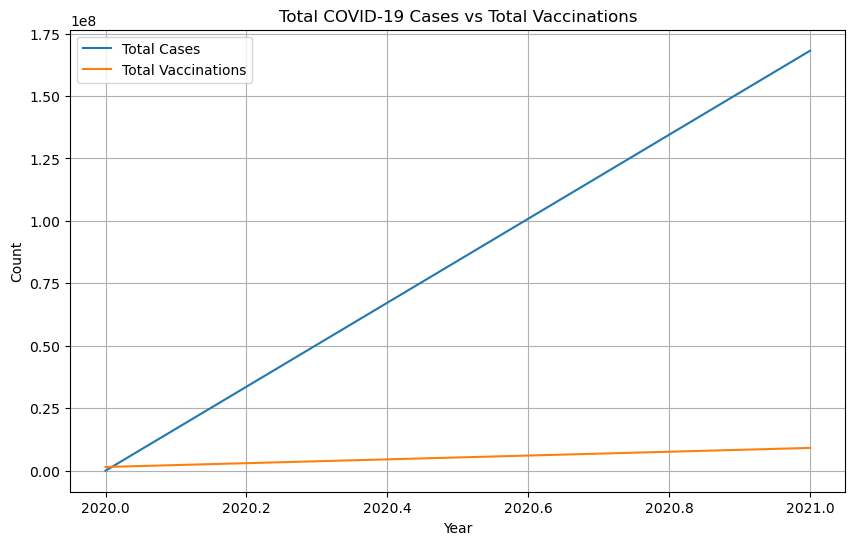

In [141]:
cases_by_year = cleaned_data.groupby('year')['total_cases'].sum()
vaccinations_by_year = cleaned_data.groupby('year')['total_vaccinations'].max()

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(cases_by_year.index, cases_by_year.values, label='Total Cases')
plt.plot(vaccinations_by_year.index, vaccinations_by_year.values, label='Total Vaccinations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases vs Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
average_cases_deaths = cleaned_data.groupby('year').agg({'total_cases': 'mean', 'total_deaths': 'mean'})
print(average_cases_deaths)


In [ ]:
average_cases_deaths = cleaned_data.groupby('year').agg({'total_cases': 'mean', 'total_deaths': 'mean'})
print(average_cases_deaths)


In [ ]:
total_cases_deaths_by_country = cleaned_data.groupby('location').agg({'total_cases': 'sum', 'total_deaths': 'sum'})
print(total_cases_deaths_by_country)